# Большое Домашнее Задание по ML

{'mail': '**********',  
 'id': 2789628968,  
 'type': 'regression',  
 'dataset': {'name': 'Diabetes Data Set',  
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'},  

'method': ['SVR', 'Надарая-Ватсона']}  

python 3.8.5 64-bit (conda)

## Импорт

Импортируем необходимые методы и модули

In [277]:
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

import seaborn
import matplotlib.pyplot as mathp
import seaborn as sns

import pandas

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from scipy.spatial.distance import cdist
import numpy as np
import math

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd


## Загружаем данные

In [278]:
diabetes_dataset = load_diabetes()

X = diabetes_dataset.data
Y = diabetes_dataset.target
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (442, 10)
Y shape: (442,)


## Визуализируем данные

In [279]:
pd.DataFrame(X, columns=diabetes_dataset.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Если посмотреть на данные сверху, то видно, что данные уже масштабированы. Действительно, каждая из 10 характеристик центрирована по среднему значению и масштабирована на стандартное отклонение, умноженое на количество самплов.
То есть сумма квадратов каждого столбца составялет единицу.

Формула:
$$
score = \frac{x_i - mean}{deviation}
$$

Посмотрим на Y

In [284]:
pd.DataFrame(Y, columns=["Y"])

,Y
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


Построим карту, чтобы посмотреть как соотносятся между собой соответствующие характеристики

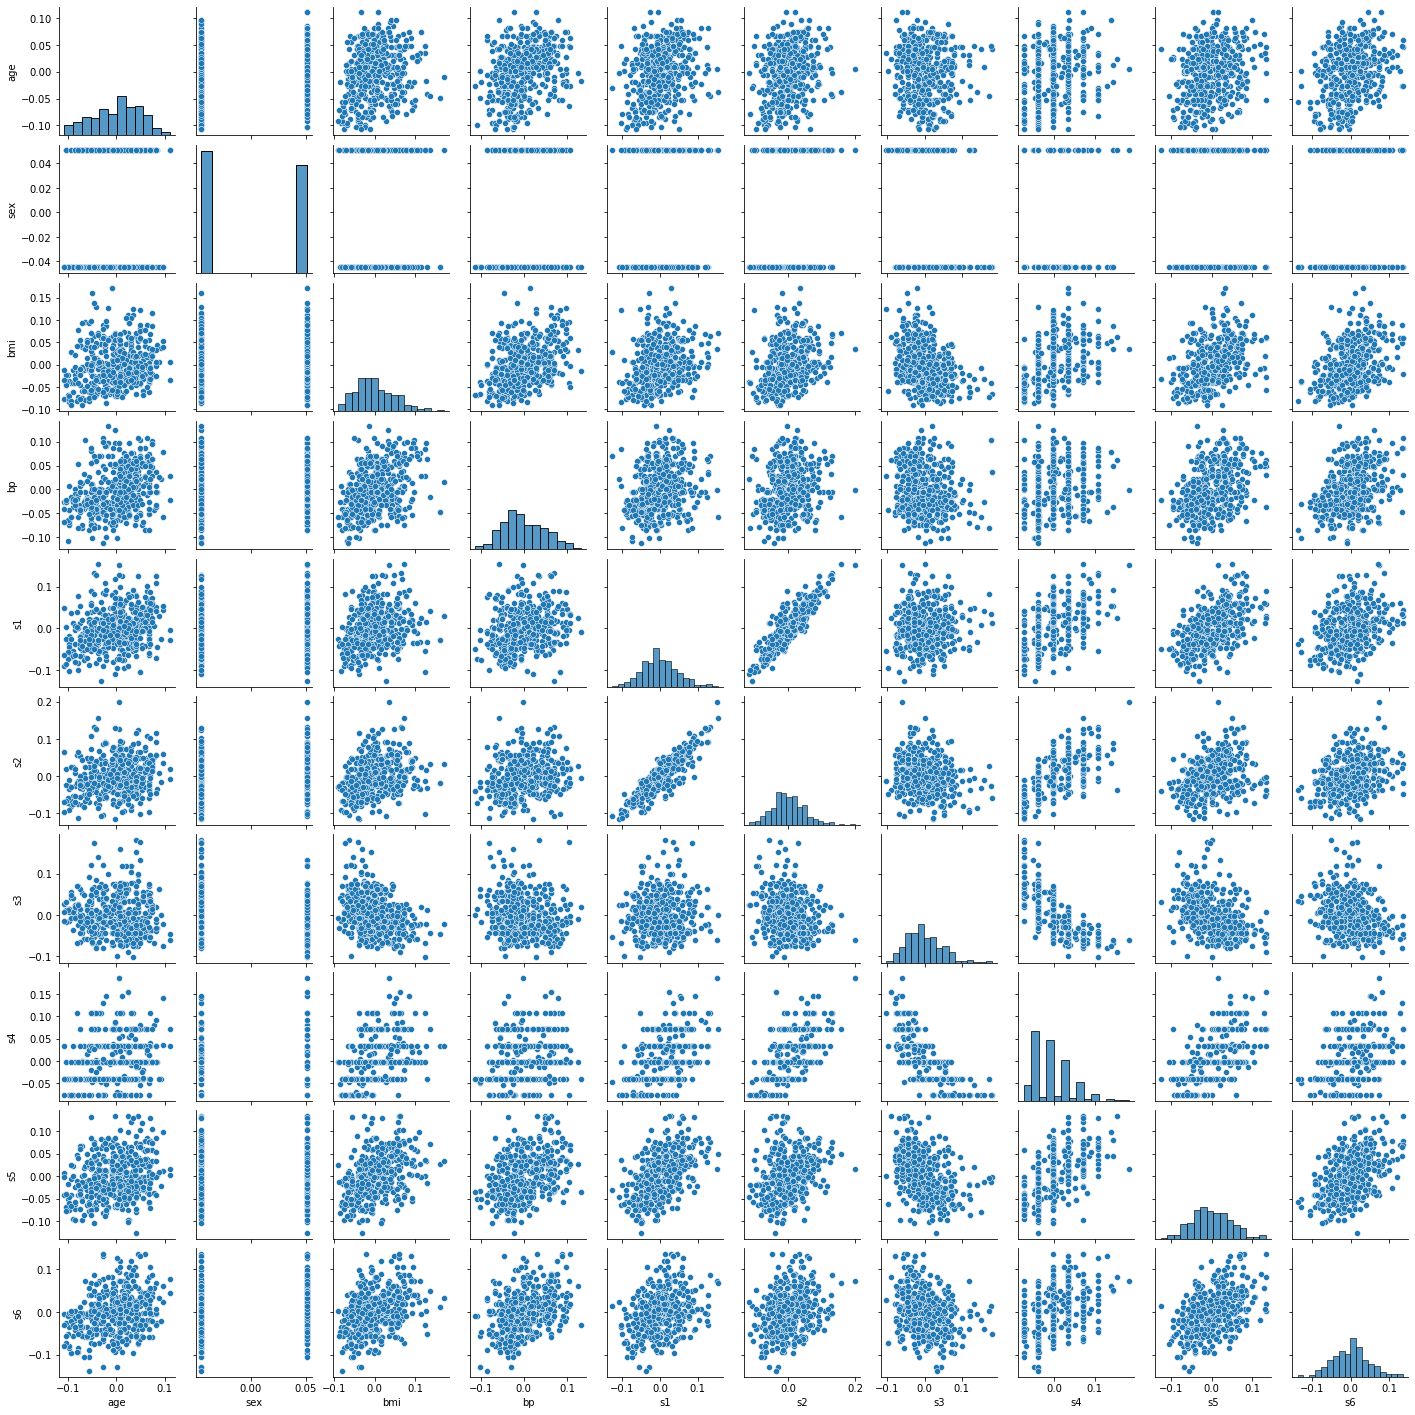

In [285]:
seaborn.pairplot(pandas.DataFrame(X, columns=diabetes_dataset.feature_names), height=2)
mathp.show()

Можем проанализирвоать прогрессирование диабета

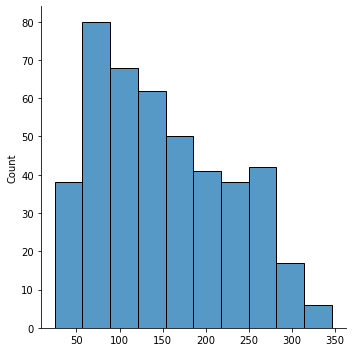

In [286]:
sns.displot(Y)

## Предобработка(нормировка) данных

Если посмотреть на результаты исследования данных в предедущем разделе, то можно сделать вывод, что нет нужды в нормализации данных. поскольку данные уже приведены к нужному виду благодаря sklearn.

Однако, все-таки, воспользуемся MinMaxScaler и StandardScaler и посмотрим, как это повлияет на результат.

In [287]:
X_normilized = MinMaxScaler().fit_transform(X)
X_st_normilized = StandardScaler().fit_transform(X)

In [288]:
pd.DataFrame(X_normilized, columns=diabetes_dataset.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333
...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605670,0.530303
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415790,0.666667
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657020,0.409091


In [289]:
pd.DataFrame(X_st_normilized, columns=diabetes_dataset.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


Разобьем данные

In [290]:
X_train, X_test, Y_train, Y_test = train_test_split(X_st_normilized, Y, test_size=0.25)

X_train_jn, X_test_jn, Y_train_jn, Y_test_jn = train_test_split(X_normilized, Y, test_size=0.25)

In [291]:
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X, Y, test_size=0.25)

## SVR
Воспользуемся библиотечными средствами.

In [292]:
regular_C = [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500, 2000, 5000, 7000, 10000]
gamma_params = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
params = [
            {'kernel': ['linear'], 'C': regular_C}, # Линейное ядро
            {'kernel': ['poly', 'rbf', 'sigmoid'], 'C': regular_C, 'gamma': gamma_params} # нелинейные ядра
         ]

model = GridSearchCV(SVR(), params, refit=True, scoring=None, n_jobs=8) # подбираем максимально подходящие параметры

In [293]:
model.fit(X_train, Y_train)

GridSearchCV(estimator=SVR(), n_jobs=8,
             param_grid=[{'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                    1e-07, 1e-08, 1e-09, 1e-10],
                          'kernel': ['poly', 'rbf', 'sigmoid']}])

In [294]:
print("Выбранные параметры: " + str(model.best_params_))
print()
print("Среднеквадратичная ошибка: " + str(format(mean_squared_error(Y_test, model.predict(X_test)))))
print()
print("Результат на train наборе : " + str(format(model.score(X_train, Y_train))))
print("Результат на test наборе: " + str(format(model.score(X_test, Y_test))))

Выбранные параметры: {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}

Среднеквадратичная ошибка: 3247.8680304606023

Результат на train наборе : 0.45476377859274386
Результат на test наборе: 0.5345783212410902


In [295]:
model.fit(X_train_jn, Y_train_jn)

GridSearchCV(estimator=SVR(), n_jobs=8,
             param_grid=[{'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                    1e-07, 1e-08, 1e-09, 1e-10],
                          'kernel': ['poly', 'rbf', 'sigmoid']}])

In [296]:
print("Выбранные параметры: " + str(model.best_params_))
print()
print("Среднеквадратичная ошибка: " + str(format(mean_squared_error(Y_test_jn, model.predict(X_test_jn)))))
print()
print("Результат на train наборе : " + str(format(model.score(X_train_jn, Y_train_jn))))
print("Результат на test наборе: " + str(format(model.score(X_test_jn, Y_test_jn))))

Выбранные параметры: {'C': 700, 'gamma': 0.1, 'kernel': 'rbf'}

Среднеквадратичная ошибка: 2748.5764969395955

Результат на train наборе : 0.5575333963327684
Результат на test наборе: 0.48231384749024675


In [297]:
model.fit(X_train_0, Y_train_0)

GridSearchCV(estimator=SVR(), n_jobs=8,
             param_grid=[{'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700,
                                800, 900, 1000, 1200, 1500, 2000, 5000, 7000,
                                10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                    1e-07, 1e-08, 1e-09, 1e-10],
                          'kernel': ['poly', 'rbf', 'sigmoid']}])

In [298]:
print("Выбранные параметры: " + str(model.best_params_))
print()
print("Среднеквадратичная ошибка: " + str(format(mean_squared_error(Y_test_0, model.predict(X_test_0)))))
print()
print("Результат на train наборе : " + str(format(model.score(X_train_0, Y_train_0))))
print("Результат на test наборе: " + str(format(model.score(X_test_0, Y_test_0))))

Выбранные параметры: {'C': 1500, 'gamma': 0.1, 'kernel': 'rbf'}

Среднеквадратичная ошибка: 3048.2169709641444

Результат на train наборе : 0.5272704474659595
Результат на test наборе: 0.41592900772577557


## Выводы SVC

Лучший результат:
```
Среднеквадратичная ошибка: 2748.5764969395955
Результат на train наборе : 0.5575333963327684
Результат на test наборе: 0.48231384749024675
```

## Метод Надарая-Ватсона

# Список ядер

In [309]:
def K1(distance, h=0.05):
    ret = np.array(distance)/h
    return 0.75 * (1 - ret**2) * (np.abs(ret) <= 1)

def K2(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2)**2 * (np.abs(ret) <= 1)

def K3(distance, h=0.05):
    dist = np.array(distance) / h
    return (1 / math.sqrt(2 * math.pi)) * np.exp((-(dist ** 2)) / 2)

def K4(distance, h=0.05):
    pi = 3.14
    ret = np.array(distance)/h
    return 1 / (np.exp(ret) + np.exp(-ret) + 2)

def K5(distance, h=0.05):
    pi = 3.14
    ret = np.array(distance)/h
    sqrt_2 = math.sqrt(2)
    ret_abs = np.abs(ret)
    return 0.5 * np.exp(-ret_abs / sqrt_2) * np.sin((ret_abs / sqrt_2) + pi / 4)

def K6(distance, h=0.05):
    dist = np.array(distance) / h
    return (1 - np.abs(dist)) * (np.abs(dist) <= 1)

def K7(distance, h=0.05):
    pi = 3.14
    ret = np.array(distance)/h
    return np.cos(pi / 2 * ret)

def K8(distance, h=0.05):
    dist = np.array(distance) / h
    return (15.0 / 16.0) * ((1 - dist ** 2) ** 2) * (np.abs(dist) <= 1)

In [310]:
class NadarayaWatsonKR(object):

    def __init__(self, kernel='standard', n_neighbors=1):
        kernels ={
            'standard' : K1,
            'epanechnikov' : K1,
            'square' : K2,
            'gaussian' : K3,
            'sigmoid' : K4,
            'silv' : K5,
            'triangular' : K6,
            'cosinus' : K7,
            'quartic' : K8
            
        }

        self.X, self.Y, self.window_size = None, None, None
        self.K = kernels[kernel]
        self.kernel_name = kernel
        self.neighs = n_neighbors

    def fit(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)
        
    def predict(self, X_other):
        space_paths = cdist(X_other, self.X)
        exhaust = self.K(space_paths, np.sort(space_paths)[:,self.neighs][:, None])
        return np.sum(exhaust * self.Y, axis=-1) / (np.sum(exhaust, axis=-1) + 1*10**(-10))

In [311]:
n_kf = 10
kernels = ['epanechnikov', 'square', 'gaussian', 'sigmoid', 'silv', 'triangular', 'cosinus', 'quartic']
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

In [312]:
def check(Model, kernels, neighbors, n_kf, X, Y):
    kf = KFold(n_kf)
    results = list()
    krs = list()
    for kernel in kernels:
        supp = list()
        for neighbor in neighbors:
            MSES = 0.
            for train_indices, test_indices in kf.split(X):
                model = Model(kernel, neighbor)
                model.fit(X[train_indices], Y[train_indices])
                predict = model.predict(X[test_indices])
                MSES += mean_squared_error(Y[test_indices], predict)
            supp.append(MSES/n_kf)
        results.append(supp)
    return results

In [313]:
results_0 = check(NadarayaWatsonKR, kernels, neighbors, n_kf, X, Y)
minim = results_0[0][0]
kr = 0
ind = 0
for l in results_0:
    for i in l:
        if i < minim:
            minim = i
            kr = ind
    ind += 1
print("Ядро: " + kernels[kr])
print("Минимальный score: " + str(minim))

Ядро: epanechnikov
Минимальный score: 3239.386039363117


In [314]:
results_x2 = check(NadarayaWatsonKR, kernels, neighbors, n_kf, X_st_normilized, Y)
minim = results_x2[0][0]
kr = 0
ind = 0
for l in results_x2:
    for i in l:
        if i < minim:
            minim = i
            kr = ind
    ind += 1
print("Ядро: " + kernels[kr])
print("Минимальный score: " + str(minim))

Ядро: epanechnikov
Минимальный score: 3239.3860393631444


In [315]:
results = check(NadarayaWatsonKR, kernels, neighbors, n_kf, X_normilized, Y)
minim = results[0][0]
kr = 0
ind = 0
for l in results:
    for i in l:
        if i < minim:
            minim = i
            kr = ind
    ind += 1
print("Ядро: " + kernels[kr])
print("Минимальный score: " + str(minim))

Ядро: epanechnikov
Минимальный score: 3255.650587338578


In [316]:
pd.DataFrame(results_0, index=[kernal_name for kernal_name in kernels], columns=neighbors)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
epanechnikov,6.107906e+03,5.209012e+03,4550.569041,4132.874747,3922.423262,3830.335935,3719.125640,3658.806452,3603.951452,3558.675915,...,3246.192134,3242.355565,3241.313824,3239.386039,3242.048881,3243.069502,3245.938747,3247.578458,3246.218210,3245.337830
square,6.107909e+03,5.544556e+03,4984.089120,4576.149345,4295.429373,4174.008900,4031.024781,3935.690074,3866.086605,3778.264323,...,3325.322681,3316.985915,3309.220415,3299.901685,3294.748513,3290.558669,3288.931323,3286.031417,3278.984307,3278.056344
gaussian,3.788487e+03,3.928257e+03,4014.275934,4068.392276,4118.330720,4162.310612,4202.467094,4233.572974,4258.965702,4285.810682,...,4604.808556,4613.753124,4622.650609,4630.697100,4640.233294,4648.272447,4656.454595,4665.709647,4673.178334,4680.306519
sigmoid,4.628721e+03,4.746358e+03,4812.776777,4857.850309,4897.231406,4929.999350,4959.767225,4982.800070,5003.629297,5024.470690,...,5237.070535,5243.094012,5248.696255,5254.000408,5259.830867,5264.908296,5269.882826,5275.459218,5280.082496,5284.476652
silv,4.606376e+03,4.166377e+03,4271.480144,4347.166311,4417.294312,4473.729733,4525.171484,4563.704501,4598.178752,4632.464180,...,4964.557882,4973.387908,4981.543860,4989.308977,4997.908297,5005.304135,5012.580331,5020.783800,5027.498369,5033.852865
triangular,6.107906e+03,5.228334e+03,4581.071421,4170.547285,3954.517041,3859.785254,3746.150011,3682.158787,3626.401794,3577.896512,...,3252.136652,3247.810525,3246.051396,3243.216319,3244.904235,3245.366601,3247.718570,3248.754569,3246.736425,3245.897276
cosinus,1.030250e+07,5.510700e+06,164070.539241,30777.280397,8881.997436,13869.317891,5576.498352,5593.864275,5640.685640,5757.996234,...,7360.568069,7419.155685,7474.068124,7526.990008,7582.822949,7633.460652,7683.503402,7738.645095,7787.056286,7833.834197
quartic,6.107910e+03,5.544556e+03,4984.089120,4576.149345,4295.429373,4174.008900,4031.024781,3935.690074,3866.086605,3778.264323,...,3325.322681,3316.985915,3309.220416,3299.901685,3294.748513,3290.558669,3288.931323,3286.031417,3278.984307,3278.056344


In [317]:
pd.DataFrame(results_x2, index=[kernal_name for kernal_name in kernels], columns=neighbors)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
epanechnikov,6.107906e+03,5.209012e+03,4550.569041,4132.874747,3922.423262,3830.335935,3719.125640,3658.806452,3603.951452,3558.675915,...,3246.192134,3242.355565,3241.313824,3239.386039,3242.048881,3243.069502,3245.938747,3247.578458,3246.218210,3245.337830
square,6.107909e+03,5.544556e+03,4984.089120,4576.149345,4295.429373,4174.008900,4031.024781,3935.690074,3866.086605,3778.264323,...,3325.322681,3316.985915,3309.220415,3299.901685,3294.748513,3290.558669,3288.931323,3286.031417,3278.984307,3278.056344
gaussian,3.788487e+03,3.928257e+03,4014.275934,4068.392276,4118.330720,4162.310612,4202.467094,4233.572974,4258.965702,4285.810682,...,4604.808556,4613.753124,4622.650609,4630.697100,4640.233294,4648.272447,4656.454595,4665.709647,4673.178334,4680.306519
sigmoid,4.628721e+03,4.746358e+03,4812.776777,4857.850309,4897.231406,4929.999350,4959.767225,4982.800070,5003.629297,5024.470690,...,5237.070535,5243.094012,5248.696255,5254.000408,5259.830867,5264.908296,5269.882826,5275.459218,5280.082496,5284.476652
silv,4.606376e+03,4.166377e+03,4271.480144,4347.166311,4417.294312,4473.729733,4525.171484,4563.704501,4598.178752,4632.464180,...,4964.557882,4973.387908,4981.543860,4989.308977,4997.908297,5005.304135,5012.580331,5020.783800,5027.498369,5033.852865
triangular,6.107906e+03,5.228334e+03,4581.071421,4170.547285,3954.517041,3859.785254,3746.150011,3682.158787,3626.401794,3577.896512,...,3252.136652,3247.810525,3246.051396,3243.216319,3244.904235,3245.366601,3247.718570,3248.754569,3246.736425,3245.897276
cosinus,1.030250e+07,5.510700e+06,164070.539240,30777.280397,8881.997436,13869.317891,5576.498352,5593.864275,5640.685640,5757.996234,...,7360.568069,7419.155685,7474.068124,7526.990008,7582.822949,7633.460652,7683.503402,7738.645095,7787.056286,7833.834197
quartic,6.107910e+03,5.544556e+03,4984.089120,4576.149345,4295.429373,4174.008900,4031.024781,3935.690074,3866.086605,3778.264323,...,3325.322681,3316.985915,3309.220416,3299.901685,3294.748513,3290.558669,3288.931323,3286.031417,3278.984307,3278.056344


In [318]:
pd.DataFrame(results, index=[kernal_name for kernal_name in kernels], columns=neighbors)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
epanechnikov,6.317098e+03,5260.353491,4619.737158,4140.406685,3901.473953,3774.362558,3690.146593,3.646329e+03,3.609391e+03,3560.015343,...,3259.634435,3259.605905,3258.717523,3256.695951,3255.650587,3257.861174,3258.727421,3262.435359,3264.558866,3267.220883
square,6.317087e+03,5646.390065,5131.619573,4652.748961,4333.366640,4143.538185,4028.470628,3.940201e+03,3.866195e+03,3794.247123,...,3317.793055,3311.596827,3307.276819,3300.750902,3295.849885,3293.226270,3288.951505,3287.496851,3284.421505,3283.315284
gaussian,3.747460e+03,3886.197908,3976.899976,4033.235894,4088.122092,4140.288575,4184.264078,4.220653e+03,4.253648e+03,4281.865837,...,4670.284819,4681.905497,4693.534921,4703.581035,4716.262381,4726.319755,4737.053599,4747.311505,4756.952019,4766.705867
sigmoid,4.632558e+03,4755.592861,4829.068637,4878.336069,4921.107428,4958.433253,4990.097148,5.016973e+03,5.040553e+03,5061.550460,...,5297.085496,5303.808715,5310.553159,5316.558616,5323.792856,5329.506837,5335.424786,5341.125205,5346.565370,5352.172024
silv,1.182485e+06,8287.725115,4593.502271,4321.820016,4352.028815,4387.420105,4429.668765,4.481250e+03,4.526957e+03,4566.649373,...,4989.368948,5000.462449,5011.738284,5021.570931,5033.528474,5042.847940,5052.400645,5061.699202,5070.609650,5079.706130
triangular,6.317098e+03,5285.501862,4655.385247,4184.592485,3939.928793,3808.569382,3721.440102,3.673759e+03,3.633198e+03,3581.955627,...,3263.700320,3262.916619,3261.573277,3258.975654,3257.356666,3258.854020,3258.975747,3261.817570,3263.126458,3265.138085
cosinus,1.142859e+05,166502.529136,125893.195935,163370.331629,262791.238629,354694.529501,147809.202515,1.051169e+06,8.006530e+06,268502.312038,...,9963.050426,9127.870973,7882.240521,7398.262962,8144.413686,6607.782008,6391.485107,6383.123995,6415.274524,6449.164578
quartic,6.317086e+03,5646.390062,5131.619573,4652.748961,4333.366640,4143.538185,4028.470628,3.940201e+03,3.866195e+03,3794.247123,...,3317.793055,3311.596827,3307.276819,3300.750902,3295.849885,3293.226270,3288.951505,3287.496851,3284.421505,3283.315284


## Выводы:

Я исследовал данные диабета на предмет предмет предсказания заболеваемости диабетом через год после сделанных анализов.
Для предсказания я использовал метод опорных векторов и метод Надарая-Ватсона. Как можно видеть из результатов выше, первый метод показал себя лучше, чем второй, однако оба метода выдали не лучший результат.

Если внимательнее посмотреть на карту соотношения характеристик то можно заметить множество "следов" прямых линий, поэтому, сначала я подумал, что функция предсказания будет аппроксимироваться или частично аппроксимироваться линейной функией. Возможно, что от части это дейтсвительно так, однако все результаты, которые я получил, показали неожиданно плохой результат.

Если говорить о SVR, то наилучший результат каждый раз достигается на ядре RBF (Гаусса). Что противоречило моей теории о линейности. И этот результат лучше, чем максимальный результат, показанный на методе Надарая-Ватсона, полученный на ядре epanechnikov (в метрике MSE).

Однако, если приглядетсья к данным еще раз, можно заметить более очевидный факт, заключающийся в том, что на большинстве графиков точки группируются в некоторые, напоминающие эллипс, фигуры. Такие данные трудны для исследования, для них довольно сложно построить аппроксимирующую предсказание функцию. Я попытался посмотреть подобные задачи в интернете и нашел исследования задач с с диабетом, результаты которых были сопоставимы с моими, динамика изменения процентного отношения верных предсказаний, относительно варьирования гиперпараметров, была такая же. Так же похожий результат получается и на иных методах, например на Линейной регрессии.

Следовательно, полученный результат характерен для выбранных методов и является следствием данного набора данных.